<center style="font-size:50px;">MEDIBUDDY</center>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 1. DATA LOADING & PREPARATION
# Assuming the data you provided is saved in two CSV files
# Dataset 1: age, sex, bmi, charges in INR
# Use 'r' before the file path string literal
data_health = pd.read_excel(r'C:\Users\dhara\Documents\Interns\Labmentix\Python - Medibuddy\Datasets(Excel, CSV files)\Medibuddy Insurance Data Price (1) (2).xlsx')
# Dataset 2: children, smoker, region
data_personal = pd.read_excel(r'C:\Users\dhara\Documents\Interns\Labmentix\Python - Medibuddy\Datasets(Excel, CSV files)\Medibuddy insurance data personal details (1) (2).xlsx')

# Merging both datasets on 'Policy no.'
df = pd.merge(data_health, data_personal, on='Policy no.')

In [4]:
# Quick overview of the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
 5   children        1338 non-null   int64  
 6   smoker          1338 non-null   object 
 7   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB
None
  Policy no.  age     sex     bmi  charges in INR  children smoker     region
0  PLC156898   19  female  27.900     16884.92400         0    yes  southwest
1  PLC156907   18    male  33.770      1725.55230         1     no  southeast
2  PLC156916   28    male  33.000      4449.46200         3     no  southeast
3  PLC156925   33    male  22.705     21984.47061         0     

### **1.Does the gender of the person matter for the company as a constraint for extending policies?**


Average Claims by Gender:
sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64


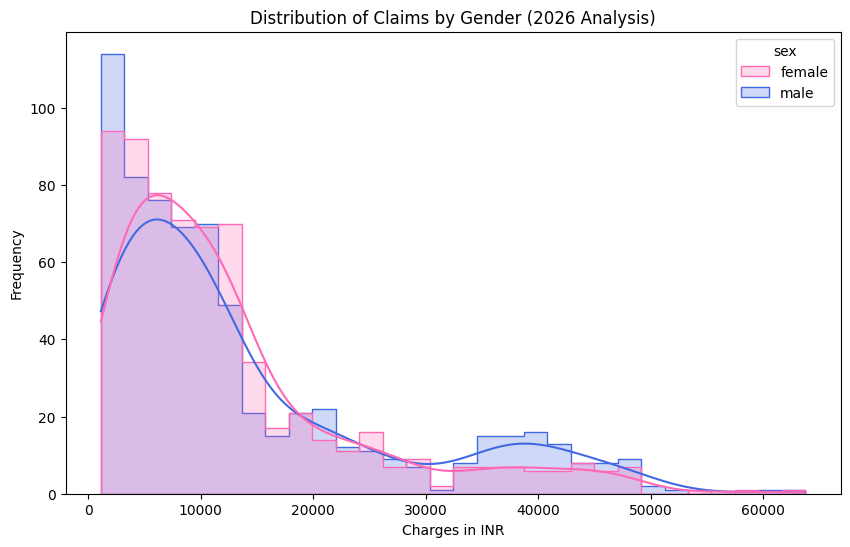

In [12]:
gender_claims = df.groupby('sex')['charges in INR'].mean()
print(f"\nAverage Claims by Gender:\n{gender_claims}")
# Create a histogram to show the distribution of claims by gender
# 1. Define custom colors mapping to your specific 'sex' labels
# Make sure these match the labels in your df['sex'] column (e.g., 'male'/'female' or 'M'/'F')
custom_colors = {'male': 'royalblue', 'female': 'hotpink'}

plt.figure(figsize=(10, 6))

# 2. Use the 'palette' parameter to apply your custom colors
sns.histplot(
    data=df, 
    x='charges in INR', 
    hue='sex', 
    kde=True, 
    element="step", 
    palette=custom_colors)
plt.title('Distribution of Claims by Gender (2026 Analysis)')
plt.xlabel('Charges in INR')
plt.ylabel('Frequency')
plt.show()

* Observation : The gender is not a constraint for the company to give a policy or not since nearly equal number of policies have been handed out to both the genders

* However, a slight difference can be seen in terms of cost incurred by caculating the mean cost for both sexes.

Sex average charges in INR female 12569.578844 male 13956.751178

* Making the medical policy for men 11.03 % more expensive than women.

### **2. What is the average amount of money the company spent over each policy cover?**

In [7]:
avg_spend = df['charges in INR'].mean()
print(f"\nAverage amount spent per policy cover: INR {avg_spend:.2f}")


Average amount spent per policy cover: INR 13270.42


### **3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?**


Average Claims by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges in INR, dtype: float64



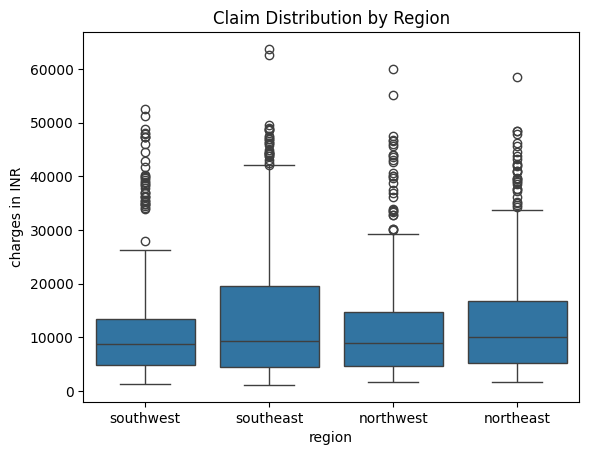

In [8]:
region_claims = df.groupby('region')['charges in INR'].mean()
print(f"\nAverage Claims by Region:\n{region_claims}\n")
sns.boxplot(x='region', y='charges in INR', data=df)
plt.title('Claim Distribution by Region')
plt.show()
# Advice: Significant variation between regions (e.g., Southeast vs Southwest) 
# would justify location-based policy pricing.

* Observation : The above data concludes that the most policies are bought from the southeast region but even then, the difference is not considerably huge.

### **4. Does the no. of dependents make a difference in the amount claimed?**

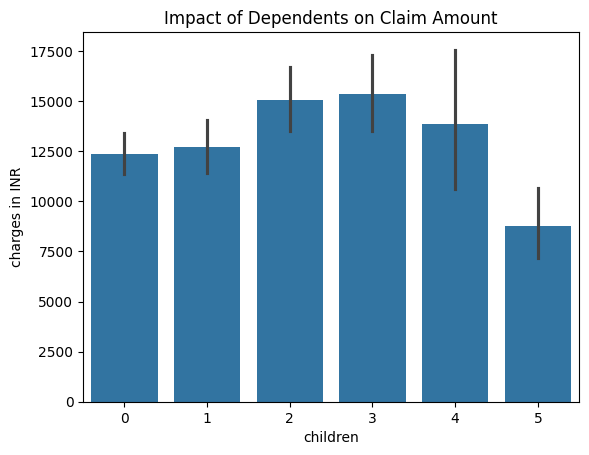

In [35]:
sns.barplot(x='children', y='charges in INR', data=df)
plt.title('Impact of Dependents on Claim Amount')
plt.show()
# Analysis: Typically, claims increase with more dependents up to a point.

* Observation : The data does not tell us the amount claimed by the individuals. Though we can infer a subtle increase in the charges in INR with increasing children but that starts to fall after the number of children crosses 3. thus the info is not sufficient for us to make deductions about the calculation of the amount of claim.

### **5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?**

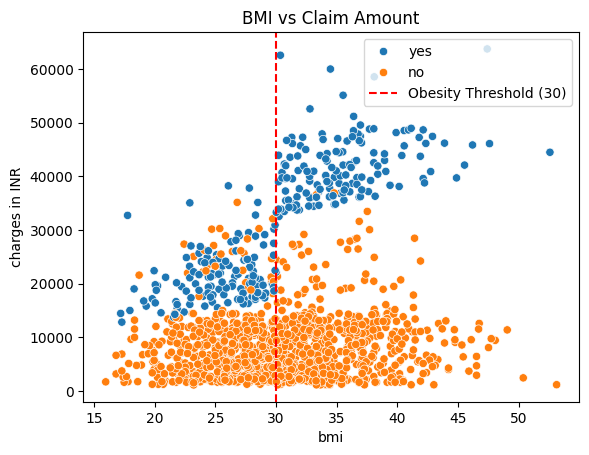

In [36]:
sns.scatterplot(x='bmi', y='charges in INR', hue='smoker', data=df)
plt.axvline(30, color='red', linestyle='--', label='Obesity Threshold (30)')
plt.title('BMI vs Claim Amount')
plt.legend()
plt.show()
# Analysis: BMI > 30 often correlates with a sharp rise in claim amounts.

* Observation : Though we can't conclude a rigid, linear trend but on the larger scale, it seems that the cost incurred increases with the bmi. This happens with the exception of a few dips probably where the bmi falls in the category : healthy weight.

### **6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?**

In [37]:
smoker_impact = df.groupby('smoker')['charges in INR'].mean()
print(f"\nSmoker vs Non-Smoker Avg Claims:\n{smoker_impact}\n")
# Analysis: Smokers usually incur dramatically higher costs, making this vital.


Smoker vs Non-Smoker Avg Claims:
smoker
no      8434.268298
yes    32050.231832
Name: charges in INR, dtype: float64



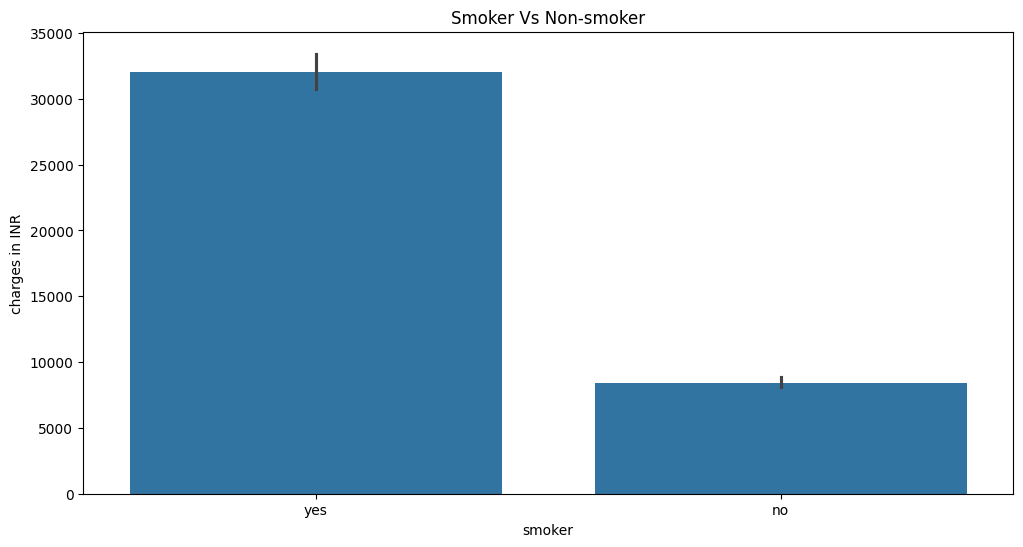

In [45]:
#depiction of the difference of the charges in INR paid by a smoker and non-smoker
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = 'smoker', y = 'charges in INR', data = df)
plt.title('Smoker Vs Non-smoker')
plt.show()

In [38]:
8434 / 32050

0.26315132605304214

*  Observation : Only 20.47% user's are smokers in the given data and most of the people who bought the policy are non-smokers. Also, on an average smoker pays ---> 32050.231832, whereas non-smoker only pays ---> 8434.268298
*  This means a non-smoker on an average only has to pay 26.315 of what smokers for the same policy.

### **7. Does age have any barrier on the insurance claimed?**

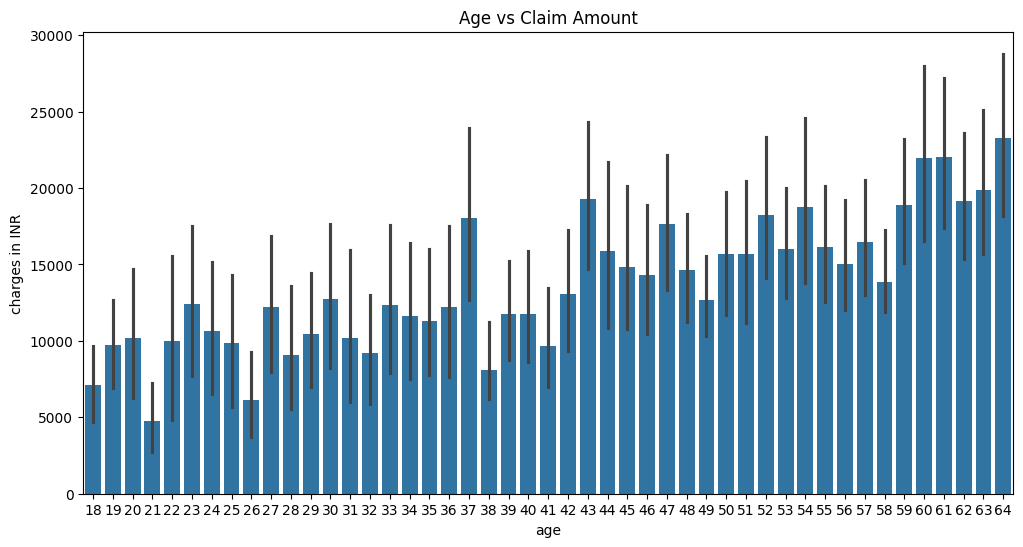

In [42]:
sns.barplot(x = 'age', y = 'charges in INR', data = df)
plt.title('Age vs Claim Amount')
plt.show()
# Analysis: Claims show a linear progression with age.

In [47]:
df.groupby('age')['charges in INR'].mean()

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges in INR, dtype: float64

* Observation: The data is insufficient to deduce/conclude any analysis on the claims. But over the long interval of time, people with more age tends to pay more charges.

In [49]:
df.groupby('age')['charges in INR'].median()

age
18     2198.189850
19     2135.891875
20     2459.720100
21     2254.423600
22     2641.155700
23     3594.538000
24     3045.137650
25     3750.148925
26     3388.882175
27     4544.324475
28     4344.951450
29     4906.409650
30     4837.582300
31     4738.268200
32     4672.016100
33     6210.083300
34     5490.091700
35     5836.520400
36     5478.036800
37     6985.506950
38     6455.862650
39     7512.267000
40     7077.189400
41     6875.961000
42     7443.643050
43    18767.737700
44     8023.135450
45     8603.823400
46     8825.086000
47     9715.841000
48     9447.382400
49     9681.120250
50    10107.220600
51     9875.680400
52    11396.900200
53    11157.174000
54    11816.449500
55    11880.231025
56    11658.247100
57    11893.878225
58    11931.125250
59    12928.791100
60    13204.285650
61    13635.637900
62    13844.797200
63    14349.854400
64    15528.758375
Name: charges in INR, dtype: float64

### **8. Can the company extend certain discounts after checking the health status (BMI) in this case?**

In [18]:
# Healthy BMI range is typically 18.5 to 24.9
df['BMI_Category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], 
                            labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])

healthy_mean = df[df['BMI_Category'] == 'Healthy']['charges in INR'].mean()
obese_mean = df[df['BMI_Category'] == 'Obese']['charges in INR'].mean()

print(f"\nAvg Claim for Healthy BMI: INR {healthy_mean:.2f}")
print(f"Avg Claim for Obese BMI: INR {obese_mean:.2f}")
# Logic: If healthy individuals claim less, MediBuddy can safely offer discounts.


Avg Claim for Healthy BMI: INR 10404.90
Avg Claim for Obese BMI: INR 15491.54


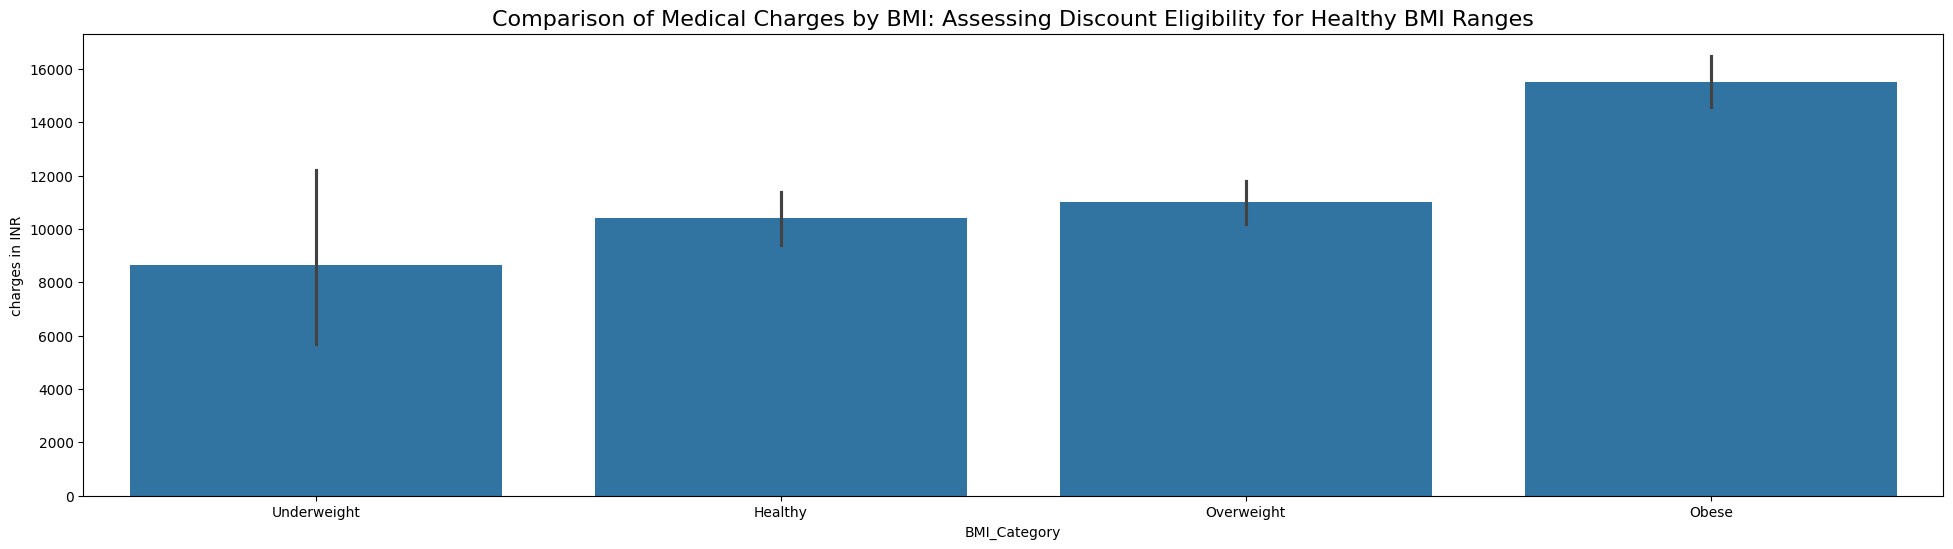

In [15]:
# Visualization using the correct DataFrame
plt.figure(figsize=(24, 6))
sns.barplot(x='BMI_Category', y='charges in INR', data=df) # Use df here to match the new column
plt.title('Comparison of Medical Charges by BMI: Assessing Discount Eligibility for Healthy BMI Ranges', fontsize=16)
plt.show()

* Observation: As per graph, on a mild scale the Charges in INR tends to increase with the Bmi, With the exception Bmi falls in the category of : Healthy weight, the charges reduces too company may providing larger discounts too younger people and smaller discounts to older people.